In [ ]:
!pip install rdflib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.6 MB/s eta 0:00:00


In [ ]:
from rdflib import URIRef, BNode, Literal, Namespace, Graph
from rdflib.namespace import Namespace, NamespaceManager
from rdflib.plugins import sparql
from rdflib.namespace import RDF, RDFS, XSD
from rdflib.serializer import Serializer

import numpy as np
import pandas as pd
import os

In [ ]:
df_size = pd.read_csv('AKC_Breed_Info.csv', encoding='cp1251',
                      na_values=['na', 'not found'])

df_size['Breed'] = df_size['Breed'].apply(lambda x: '_'.join(x.lower().split()))

In [ ]:
def inch_to_cm(inch_val):
    return np.ceil(inch_val * 2.54)

def lbs_to_kg(lbs_val):
    return np.ceil(lbs_val / 2.205)

In [ ]:
df_size = df_size.rename(columns={'height_low_inches': 'height_low_cm', 'height_high_inches': 'height_high_cm',
                        'weight_low_lbs': 'weight_low_kg', 'weight_high_lbs': 'weight_high_kg'})
df_size['height_low_cm'] = df_size['height_low_cm'].apply(inch_to_cm)
df_size['height_high_cm'] = df_size['height_high_cm'].apply(inch_to_cm)
df_size['weight_low_kg'] = df_size['weight_low_kg'].apply(lbs_to_kg)
df_size['weight_high_kg'] = df_size['weight_high_kg'].apply(lbs_to_kg)

In [ ]:
df_size

,Breed,height_low_cm,height_high_cm,weight_low_kg,weight_high_kg
0,akita,67.0,72.0,37.0,55.0
1,anatolian_sheepdog,69.0,74.0,46.0,69.0
2,bernese_mountain_dog,59.0,69.0,39.0,50.0
3,bloodhound,61.0,67.0,37.0,55.0
4,borzoi,67.0,72.0,32.0,46.0
...,...,...,...,...,...
145,papillon,21.0,28.0,3.0,5.0
146,pomeranian,31.0,31.0,2.0,4.0
147,toy_poodle,26.0,26.0,5.0,5.0
148,toy_fox_terrier,26.0,26.0,2.0,4.0


In [ ]:
df_intell = pd.read_csv('dog_intelligence.csv')
df_intell['Breed'] = df_intell['Breed'].apply(lambda x: '_'.join(x.lower().split()))
df_intell['Classification'] = df_intell['Classification'].apply(lambda x: '_'.join(x.lower().replace('/', '_').split()))
df_intell

,Breed,Classification,obey,reps_lower,reps_upper
0,border_collie,brightest_dogs,95%,1,4
1,poodle,brightest_dogs,95%,1,4
2,german_shepherd,brightest_dogs,95%,1,4
3,golden_retriever,brightest_dogs,95%,1,4
4,doberman_pinscher,brightest_dogs,95%,1,4
...,...,...,...,...,...
131,borzoi,lowest_degree_of_working_obedience_intelligence,NaN,81,100
132,chow_chow,lowest_degree_of_working_obedience_intelligence,NaN,81,100
133,bulldog,lowest_degree_of_working_obedience_intelligence,NaN,81,100
134,basenji,lowest_degree_of_working_obedience_intelligence,NaN,81,100


In [ ]:
df_intell['obey'].unique()

array(['95%', '85%', '70%', '50%', '30%', nan], dtype=object)

In [ ]:
df_intell['Classification'].unique()

array(['brightest_dogs', 'excellent_working_dogs',
       'above_average_working_dogs',
       'average_working_obedience_intelligence',
       'fair_working_obedience_intelligence',
       'lowest_degree_of_working_obedience_intelligence'], dtype=object)

In [ ]:
df_im_clf1 = pd.read_csv('df_image_old.csv')
df_im_clf2 = pd.read_csv('df_image_new.csv')

df_image = pd.concat([df_im_clf1, df_im_clf2], axis=0).reset_index(drop=True)
df_image = df_image.rename(columns={'image_name': 'image_path', 'breed': 'Breed'})
df_image['image_path'] = df_image['image_path'].apply(lambda x: f'Images/{x}')
df_image['Breed'] = df_image['Breed'].apply(lambda x: '_'.join(x.lower().split()))
df_image

,image_path,Person,Dog,Is_person,Breed
0,Images/n02091635_1177.jpg,"[{'xtl': '0.92', 'ytl': '1.91', 'xbr': '49.92'...","[{'xtl': '26.52', 'ytl': '31.12', 'xbr': '119....",True,otterhound
1,Images/n02105855_6281.jpg,"[{'xtl': '207.00', 'ytl': '60.00', 'xbr': '371...","[{'xtl': '192.08', 'ytl': '117.70', 'xbr': '37...",True,shetland_sheepdog
2,Images/n02106030_17179.jpg,"[{'xtl': '157.00', 'ytl': '51.00', 'xbr': '279...","[{'xtl': '298.00', 'ytl': '275.00', 'xbr': '48...",True,collie
3,Images/n02106550_9508.jpg,"[{'xtl': '125.00', 'ytl': '37.00', 'xbr': '225...","[{'xtl': '20.00', 'ytl': '14.00', 'xbr': '138....",True,rottweiler
4,Images/n02107142_9597.jpg,"[{'xtl': '2.00', 'ytl': '207.00', 'xbr': '178....","[{'xtl': '105.00', 'ytl': '365.00', 'xbr': '28...",True,doberman
5,Images/n02108551_7523.jpg,"[{'xtl': '1.00', 'ytl': '28.00', 'xbr': '333.0...","[{'xtl': '304.00', 'ytl': '131.00', 'xbr': '50...",True,tibetan_mastiff
6,Images/n02110185_5624.jpg,"[{'xtl': '157.00', 'ytl': '23.00', 'xbr': '500...","[{'xtl': '23.00', 'ytl': '132.00', 'xbr': '336...",True,siberian_husky
7,Images/n02111277_4854.jpg,"[{'xtl': '253.00', 'ytl': '98.00', 'xbr': '499...","[{'xtl': '214.50', 'ytl': '59.80', 'xbr': '347...",True,newfoundland
8,Images/n02113023_3181.jpg,"[{'xtl': '107.00', 'ytl': '50.00', 'xbr': '343...","[{'xtl': '34.00', 'ytl': '262.00', 'xbr': '315...",True,pembroke
9,Images/n02115641_9302.jpg,"[{'xtl': '347.20', 'ytl': '105.49', 'xbr': '47...","[{'xtl': '123.60', 'ytl': '178.10', 'xbr': '34...",True,dingo


In [ ]:
def change_path(row):
    if row['image_path_l'] is not np.NaN:
        return row['image_path_l']
    else:
        return row['image_path']


df_image_path = pd.read_csv('ImagePath_1.csv', index_col=0)
df_image_path = df_image_path.rename(columns={'breed': 'Breed'})
df_image_path['Breed'] = df_image_path['Breed'].apply(lambda x: '_'.join(x.lower().split()))

df_image_all = df_image.join(df_image_path.set_index('Breed'), on='Breed', lsuffix='_l', how='outer').reset_index(drop=True)
df_image_all['image_path'] = df_image_all.apply(change_path, axis=1)
df_image_all = df_image_all.drop('image_path_l', axis=1)

In [ ]:
df_image_all

,Person,Dog,Is_person,Breed,image_path
0,"[{'xtl': '0.92', 'ytl': '1.91', 'xbr': '49.92'...","[{'xtl': '26.52', 'ytl': '31.12', 'xbr': '119....",True,otterhound,Images/n02091635_1177.jpg
1,"[{'xtl': '207.00', 'ytl': '60.00', 'xbr': '371...","[{'xtl': '192.08', 'ytl': '117.70', 'xbr': '37...",True,shetland_sheepdog,Images/n02105855_6281.jpg
2,"[{'xtl': '157.00', 'ytl': '51.00', 'xbr': '279...","[{'xtl': '298.00', 'ytl': '275.00', 'xbr': '48...",True,collie,Images/n02106030_17179.jpg
3,"[{'xtl': '125.00', 'ytl': '37.00', 'xbr': '225...","[{'xtl': '20.00', 'ytl': '14.00', 'xbr': '138....",True,rottweiler,Images/n02106550_9508.jpg
4,"[{'xtl': '2.00', 'ytl': '207.00', 'xbr': '178....","[{'xtl': '105.00', 'ytl': '365.00', 'xbr': '28...",True,doberman,Images/n02107142_9597.jpg
...,...,...,...,...,...
115,NaN,NaN,NaN,leonberg,Images/n02111129-Leonberg/n02111129_1153.jpg
116,NaN,NaN,NaN,samoyed,Images/n02111889-Samoyed/n02111889_10950.jpg
117,NaN,NaN,NaN,dhole,Images/n02115913-dhole/n02115913_1067.jpg
118,NaN,NaN,NaN,african_hunting_dog,Images/n02116738-African_hunting_dog/n02116738...


In [ ]:
df_audio = pd.read_csv('data_audio.csv')
df_audio = df_audio.rename(columns={'breed': 'Breed'})
df_audio['Breed'] = df_audio['Breed'].apply(lambda x: '_'.join(x.lower().split()))
df_audio

,Breed,audio_path,power_dB
0,schipperke,/content/lay-malenkoy-sobaki-shpits-35392.wav,81.29
1,siberian_husky,/content/lay-sobaki-eskimosskaya-layka-35389.wav,80.11
2,doberman,/content/lay-dobermana.wav,81.58
3,scottish_deerhound,/content/lay-sobaki-porodyi-kolli-25610.wav,88.42
4,mastiff,/content/sobaka-porodyi-mastif-25584.wav,82.26
5,rottweiler,/content/sobaka-rotveyler-25637.wav,83.17


In [ ]:
df_all = df_size.join(df_intell.set_index('Breed'), on='Breed', how='outer').reset_index(drop=True)
df_all = df_all.join(df_image_all.set_index('Breed'), on='Breed', how='outer').reset_index(drop=True)
df_all = df_all.join(df_audio.set_index('Breed'), on='Breed', how='outer').reset_index(drop=True)
df_all

,Breed,height_low_cm,height_high_cm,weight_low_kg,weight_high_kg,Classification,obey,reps_lower,reps_upper,Person,Dog,Is_person,image_path,audio_path,power_dB
0,akita,67.0,72.0,37.0,55.0,average_working_obedience_intelligence,50%,26.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN
1,anatolian_sheepdog,69.0,74.0,46.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bernese_mountain_dog,59.0,69.0,39.0,50.0,excellent_working_dogs,85%,5.0,15.0,[],"[{'xtl': '132.00', 'ytl': '128.80', 'xbr': '29...",False,Images/n02107683_1175.jpg,NaN,NaN
3,bloodhound,61.0,67.0,37.0,55.0,lowest_degree_of_working_obedience_intelligence,NaN,81.0,100.0,[],"[{'xtl': '40.00', 'ytl': '8.00', 'xbr': '211.0...",False,Images/n02088466_1015.jpg,NaN,NaN
4,borzoi,67.0,72.0,32.0,46.0,lowest_degree_of_working_obedience_intelligence,NaN,81.0,100.0,[],"[{'xtl': '94.00', 'ytl': '73.00', 'xbr': '436....",False,Images/n02090622_10492.jpg,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,blenheim_spaniel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Images/n02086646-Blenheim_spaniel/n02086646_10...,NaN,NaN
214,entlebucher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Images/n02108000-EntleBucher/n02108000_1111.jpg,NaN,NaN
215,leonberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Images/n02111129-Leonberg/n02111129_1153.jpg,NaN,NaN
216,dhole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Images/n02115913-dhole/n02115913_1067.jpg,NaN,NaN


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Breed           218 non-null    object 
 1   height_low_cm   148 non-null    float64
 2   height_high_cm  148 non-null    float64
 3   weight_low_kg   148 non-null    float64
 4   weight_high_kg  148 non-null    float64
 5   Classification  137 non-null    object 
 6   obey            126 non-null    object 
 7   reps_lower      137 non-null    float64
 8   reps_upper      137 non-null    float64
 9   Person          32 non-null     object 
 10  Dog             32 non-null     object 
 11  Is_person       32 non-null     object 
 12  image_path      121 non-null    object 
 13  audio_path      6 non-null      object 
 14  power_dB        6 non-null      float64
dtypes: float64(7), object(8)
memory usage: 25.7+ KB


In [ ]:
df_all.to_csv('All_data.csv', index=False)

In [ ]:
g = Graph()
path = "http://DogForFamily.ru/#"
breed_cls = URIRef(path + 'breed')
height_min_prop = URIRef(path + 'heights_min')
height_max_prop = URIRef(path + 'heights_max')
weight_min_prop = URIRef(path + 'weights_min')
weight_max_prop = URIRef(path + 'weights_max')

class_prop = URIRef(path + 'refers_to')
obey_prop = URIRef(path + 'obey_on')
reps_lower_prop = URIRef(path + 'reps_lower')
reps_upper_prop = URIRef(path + 'reps_upper')

path_img_prop = URIRef(path + 'looks_like')
person_prop = URIRef(path + 'contains_person')
dog_prop = URIRef(path + 'contains_dog')
is_person_prop = URIRef(path + 'have_person')

path_audio_prop = URIRef(path + 'sounds_like')
volume_prop = URIRef(path + 'loud_at')
volume_min_prop = URIRef(path + 'min_loud_at')
volume_max_prop = URIRef(path + 'max_loud_at')

little_cls = URIRef(path + 'Little_dogs')
medium_cls = URIRef(path + 'Medium_dogs')
big_cls = URIRef(path + 'Big_dogs')
g.add((little_cls, weight_min_prop, Literal(0)))
g.add((little_cls, weight_max_prop, Literal(5)))
g.add((medium_cls, weight_min_prop, Literal(6)))
g.add((medium_cls, weight_max_prop, Literal(45)))
g.add((big_cls, weight_min_prop, Literal(46)))

loud_cls = URIRef(path + 'Loud_dogs')
quiet_cls = URIRef(path + 'Quiet_dogs')
g.add((quiet_cls, volume_min_prop, Literal(0)))
g.add((quiet_cls, volume_max_prop, Literal(69)))
g.add((loud_cls, volume_min_prop, Literal(70)))

dog_with_human_cls = URIRef(path + 'With_human_dogs')
dog_without_human_cls = URIRef(path + 'Without_human_dogs')
g.add((dog_with_human_cls, is_person_prop, Literal(True)))
g.add((dog_without_human_cls, is_person_prop, Literal(False)))

<Graph identifier=Nd22562fced6b479faacf7809b855e1d3 (<class 'rdflib.graph.Graph'>)>

In [ ]:
medium_min_w_querry = """
                          PREFIX foaf: <http://DogForFamily.ru/#>
                          SELECT ?x
                          WHERE {
                              foaf:Medium_dogs foaf:weights_min ?x .
                      }"""

big_min_w_querry = """
                       PREFIX foaf: <http://DogForFamily.ru/#>
                       SELECT ?x
                       WHERE {
                           foaf:Big_dogs foaf:weights_min ?x .
                       }"""

loud_min_volume_querry = """
                           PREFIX foaf: <http://DogForFamily.ru/#>
                           SELECT ?x
                           WHERE {
                               foaf:Loud_dogs foaf:min_loud_at ?x .
                           }"""

In [ ]:
def add_size(id, row):
    subject_uri = None

    if row['Breed'] is not np.NaN:
        subject_uri = URIRef(path + str(row['Breed']))

        if not pd.isnull(row['height_low_cm']):
            g.add((subject_uri, height_min_prop, Literal(row['height_low_cm'])))

        if not pd.isnull(row['height_high_cm']):
            g.add((subject_uri, height_max_prop, Literal(row['height_high_cm'])))

        if not pd.isnull(row['weight_low_kg']):
            g.add((subject_uri, weight_min_prop, Literal(row['weight_low_kg'])))
            medium_min_w = g.query(medium_min_w_querry)
            medium_min_w = float(list(medium_min_w)[0][0].capitalize())
            if row['weight_low_kg'] < medium_min_w:
                g.add((subject_uri, class_prop, little_cls))
            else:
                big_min_w = g.query(big_min_w_querry)
                big_min_w = float(list(big_min_w)[0][0].capitalize())
                if row['weight_low_kg'] < big_min_w:
                    g.add((subject_uri, class_prop, medium_cls))
                else:
                    g.add((subject_uri, class_prop, big_cls))

        if not pd.isnull(row['weight_high_kg']):
            g.add((subject_uri, weight_max_prop, Literal(row['weight_high_kg'])))

    return subject_uri

def add_intelligence(id, row):
    subject_uri = None

    if not pd.isnull(row['Classification']):
        subject_uri = URIRef(path + str(row['Classification']))
        g.add((URIRef(path + str(row['Breed'])), class_prop, subject_uri))

        if not pd.isnull(row['obey']):
            g.add((subject_uri, obey_prop, Literal(row['obey'])))

        if not pd.isnull(row['reps_lower']):
            g.add((subject_uri, reps_lower_prop, Literal(row['reps_lower'])))

        if not pd.isnull(row['reps_upper']):
            g.add((subject_uri, reps_upper_prop, Literal(row['reps_upper'])))

    return subject_uri

def add_image(id, row):
    subject_uri = None

    if not pd.isnull(row['Breed']):
        subject_uri = URIRef(path + str(row['Breed']))

        if not pd.isnull(row['image_path']):
            g.add((subject_uri, path_img_prop, Literal(row['image_path'])))

        if not pd.isnull(row['Person']):
            g.add((subject_uri, person_prop, Literal(row['Person'])))

        if not pd.isnull(row['Dog']):
            g.add((subject_uri, dog_prop, Literal(row['Dog'])))

        if not pd.isnull(row['Is_person']):
            if row['Is_person']:
                g.add((subject_uri, class_prop, dog_with_human_cls))
            else:
                g.add((subject_uri, class_prop, dog_without_human_cls))


    return subject_uri

def add_audio(id, row):
    subject_uri = None

    if not pd.isnull(row['Breed']):
        subject_uri = URIRef(path + str(row['Breed']))


        if not pd.isnull(row['audio_path']):
            g.add((subject_uri, path_audio_prop, Literal(row['audio_path'])))

        if not pd.isnull(row['power_dB']):
            g.add((subject_uri, volume_prop, Literal(row['power_dB'])))

            loud_min_volume = g.query(loud_min_volume_querry)
            loud_min_volume = float(list(loud_min_volume)[0][0].capitalize())
            if row['power_dB'] < loud_min_volume:
                g.add((subject_uri, class_prop, quiet_cls))
            else:
                g.add((subject_uri, class_prop, loud_cls))

    return subject_uri


for index, row in df_all.iterrows():
    add_size(index, row)
    add_intelligence(index, row)
    add_image(index, row)
    add_audio(index, row)


In [ ]:
big_min_w = g.query(big_min_w_querry)
list(big_min_w)[0][0].capitalize()

'46'

In [ ]:
loud_min_volume = g.query(loud_min_volume_querry)
float(list(loud_min_volume)[0][0].capitalize())

70.0

In [ ]:
result = g.query("""
                    PREFIX foaf: <http://DogForFamily.ru/#>
                    SELECT ?breed
                    WHERE {
                        ?breed foaf:refers_to foaf:With_human_dogs .
                    }""")
for row in result:
    print(row[0])

http://DogForFamily.ru/#rottweiler
http://DogForFamily.ru/#doberman
http://DogForFamily.ru/#siberian_husky


In [ ]:
result = g.query("""
                    PREFIX foaf: <http://DogForFamily.ru/#>
                    SELECT ?breed
                    WHERE {
                        ?breed foaf:refers_to foaf:With_human_dogs .
                        ?breed foaf:refers_to foaf:Medium_dogs .
                        ?breed foaf:refers_to foaf:brightest_dogs .
                    }""")
for row in result:
    print(row[0])

http://DogForFamily.ru/#rottweiler


In [ ]:
g.serialize(destination='indiniduals.ttl', format='ttl')

<Graph identifier=N98655c562f1542eeaafa882cf9dd1828 (<class 'rdflib.graph.Graph'>)>

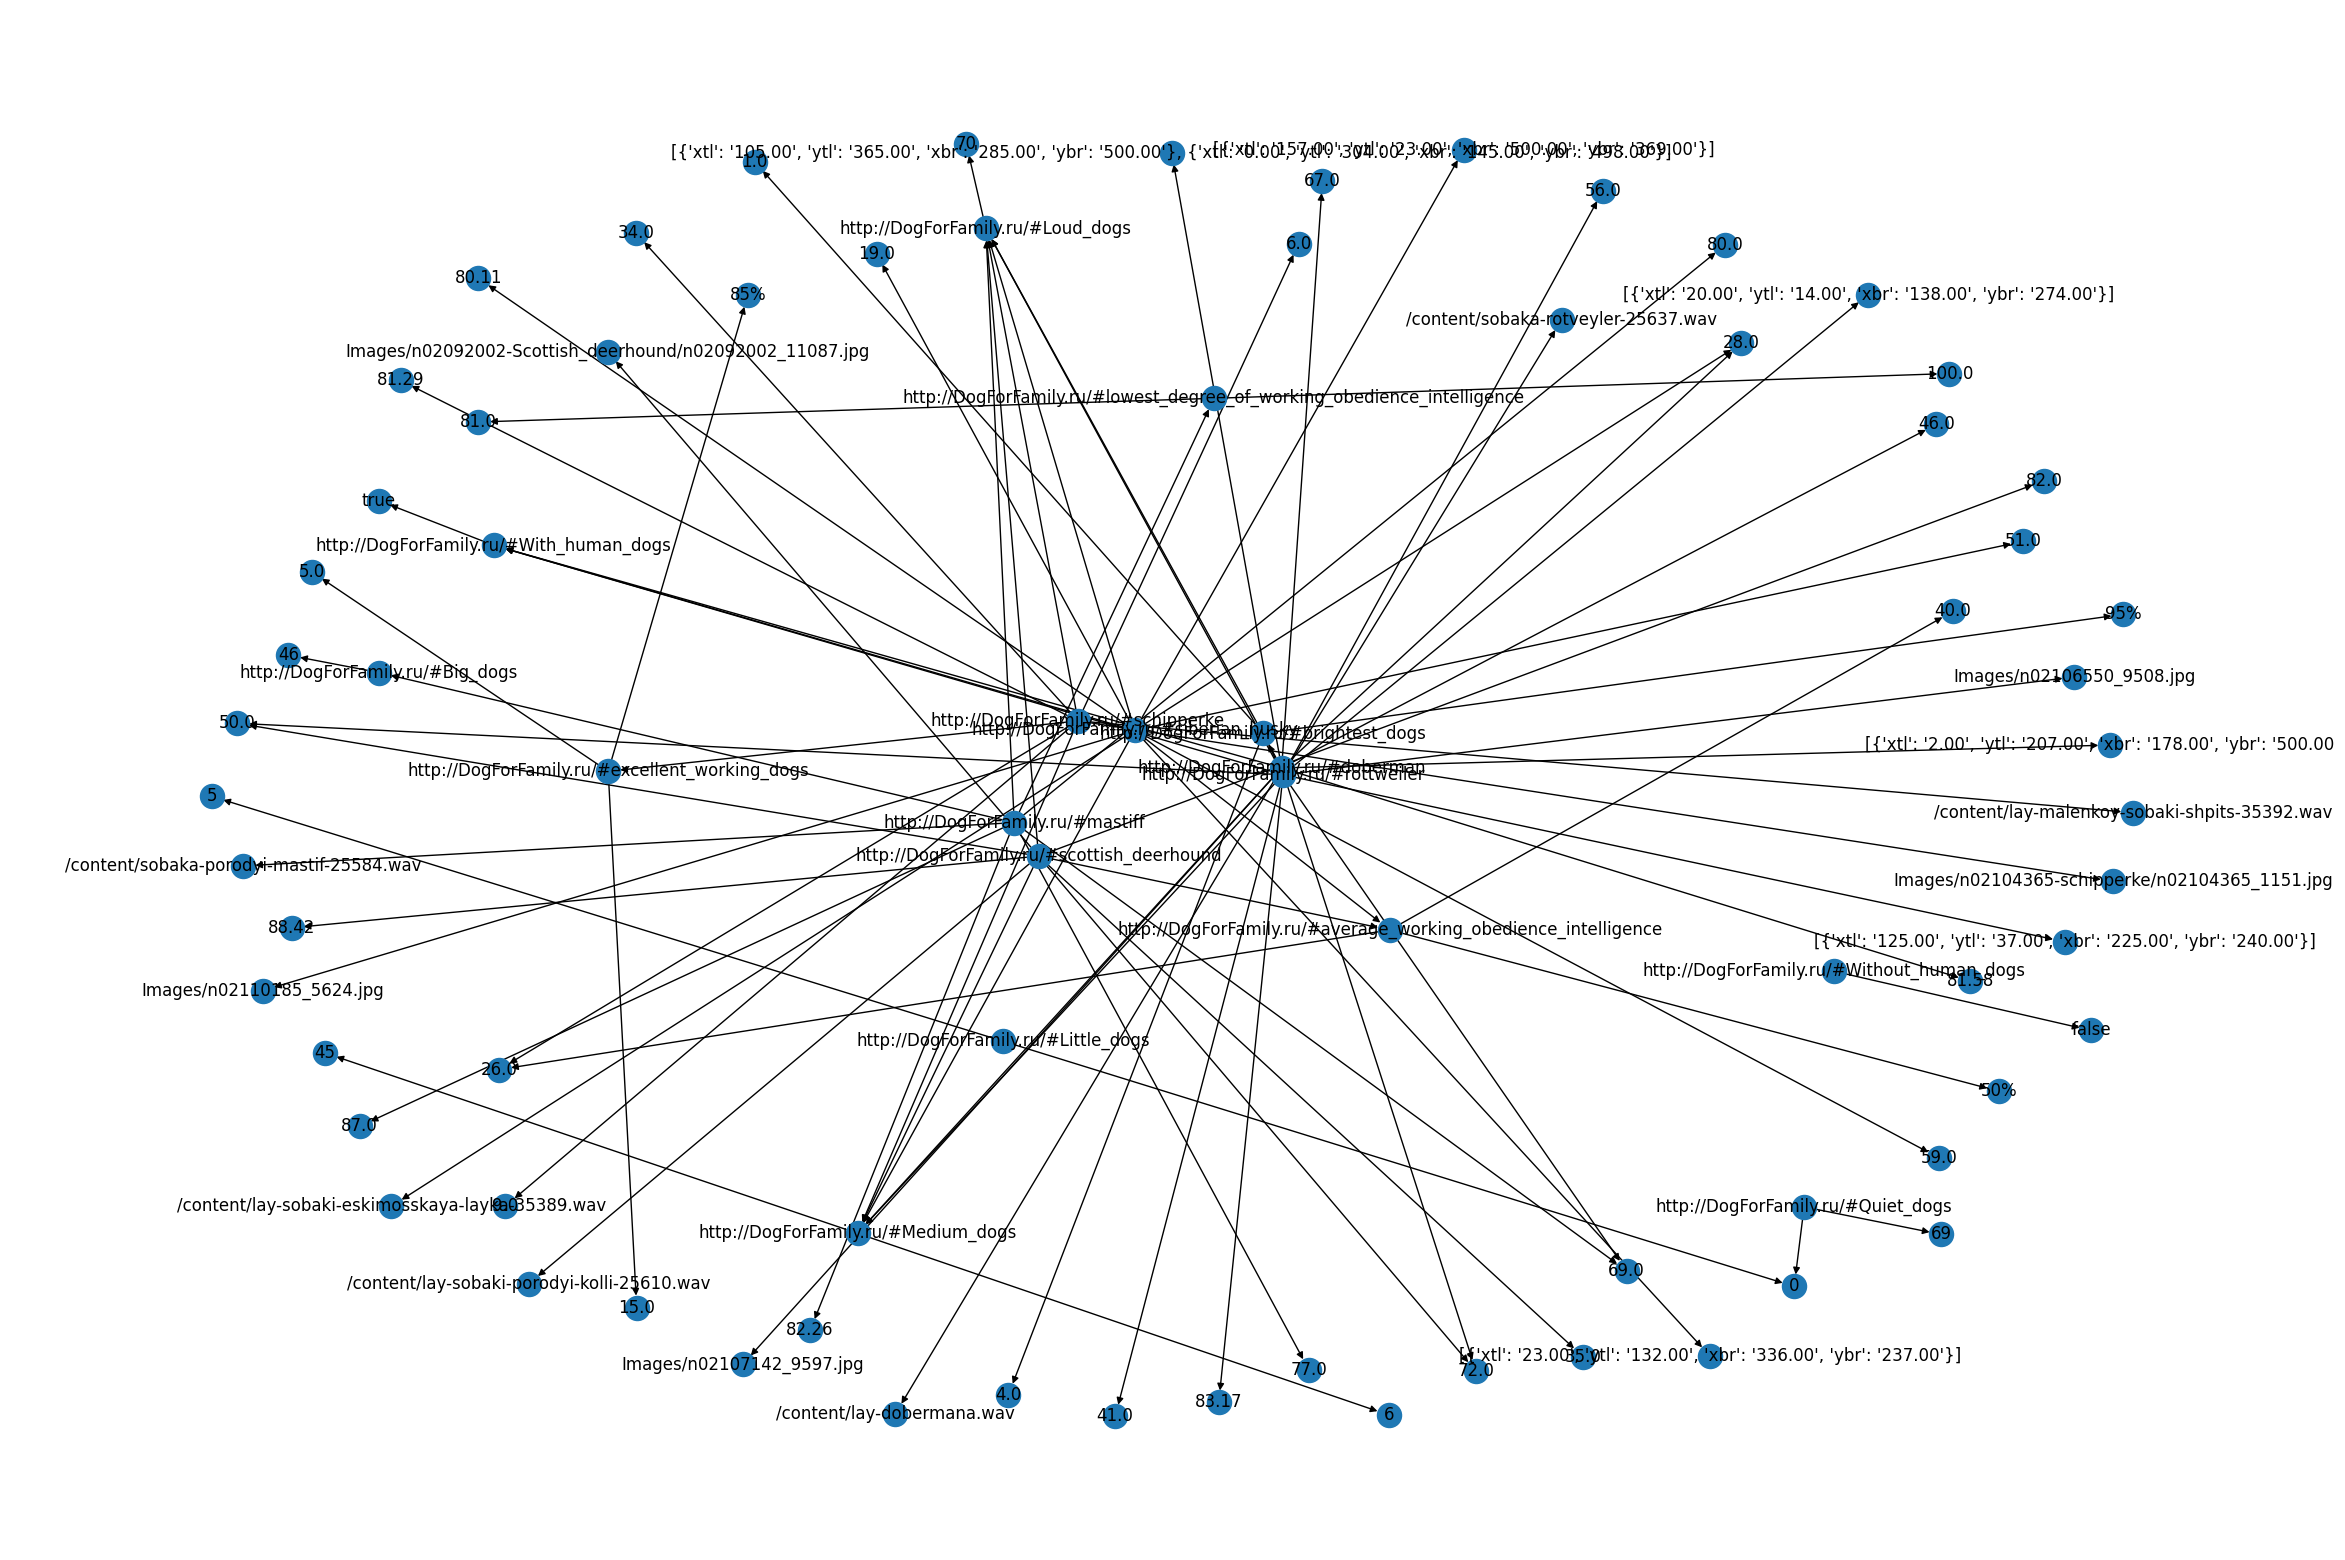

In [ ]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt

G = rdflib_to_networkx_multidigraph(g)

plt.figure(figsize=(30, 20), dpi=100)
# Plot Networkx instance of RDF Graph
pos = nx.spring_layout(G, scale=2)
edge_labels = nx.get_edge_attributes(G, 'r')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, with_labels=True)

#if not in interactive mode for
plt.show()


In [ ]:
!pip install pydotplus
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.21414 to fit



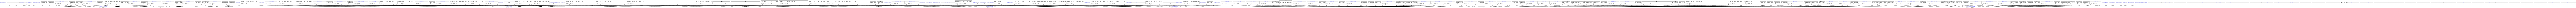

In [ ]:
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

visualize(g)